**ID 202218061**

**LAB -06**

**SUBJECT - MACHINE LEARNING**

**TOPICS - BAYESIAN DECISION BOUNDRY, LOGISTIC REGRESSION,  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Generate the datasets A and B in R2 with each of them consisting 2000 data points from
normal distribution. The dataset A and B has been drawn from the N (μ1, Σ1 ) and N(
μ2, Σ2 ) . Let us fix the μ1 = [-1,1] and μ2 = [2,2]. Separate the 250 data points from each
classes as testing set. Plot the optimal Bayesian decision boundary for following cases.


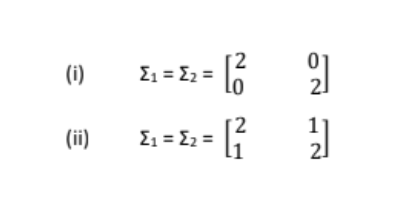

In [3]:
mu1 = np.array([-1, 1])
mu2 = np.array([2, 2])
cov = np.array([[2, 0], [0, 2]])

In [4]:
def binaryClassDataset(datapoints, mu1, mu2, cov):
  '''
  Function to generate two dataset.
  parameters : {
    datapoints (int): number of datapoints to generate in each set
    mu1 (np.array): mean of distribution 1
    mu2 (np.array): mean of distribution 2
    cov (np.array): covariance if both distributions
  }
  returns: {
    A (np.array): dataset 1 of shape(datapoints, 2)
    B (np.array): dataset 2 of shape(datapoints, 2)
  }
  '''
  A = np.random.multivariate_normal(mu1, cov, datapoints) # Dataset 1
  B = np.random.multivariate_normal(mu2, cov, datapoints) # Dataset 2
  return A, B

In [5]:
A, B = binaryClassDataset(2000, mu1, mu2, cov)

In [6]:
TrainA, TrainB = A[:1750], B[:1750]
TestA, TestB = A[:250], B[:250]

In [7]:
def BayesianClassifier(TrainA, TrainB, mu1, mu2, cov):
  '''
  Function to calculate weights and itercept of classification problem
  using bayesian classifier.
  parameters : {
    TrainA (np.array): Training set of class 1
    TrainB (np.array): Training set of class 2
    mu1 (np.array): mean of distribution 1
    mu2 (np.array): mean of distribution 2
    cov (np.array): covariance if both distributions
  }
  returns: {
    W (np.array): weights
    B (float): intercept term 
  }
  '''
  n = TrainA.shape[0] + TrainB.shape[0]   # Total length of dataset
  pw1 = TrainA.shape[0] / n   # Probability P(W1)
  pw2 = TrainB.shape[0] / n   # Probability P(W2)

  # Case 1: covariance is zero
  if all(np.diag(cov)) == 0:
    w = (mu1 - mu2)
    x0 = 0.5*(mu1 + mu2) - ((cov[0][0] / np.linalg.norm(mu1 - mu2)) * np.log(pw1/pw2) * (mu1 - mu2))
  
  # Case 2: covariance is non zero
  else:
    w = np.linalg.inv(cov) @ (mu1 - mu2)
    x0 = 0.5*(mu1 + mu2) - (np.log(pw1/pw2)/((mu1 - mu2).T @ np.linalg.inv(cov) @ (mu1 - mu2)) * (mu1 - mu2))
  b = w.T @ x0
  return w, b

In [8]:
def plotBayesianBoundary(TrainA, TrainB, TestA, TestB, W, b):

  # plt.figure(figsize = (15, 10))
  x = np.linspace(-7, 7)
  plt.ylim((-4, 9))


  plt.scatter(TrainA[:, 0], TrainA[:, 1], label = 'classification 1')
  plt.scatter(TrainB[:, 0], TrainB[:, 1], label = 'classification 2')
  plt.scatter(TestA[:, 0], TestA[:, 1], marker = '*', label = 'Test class 1')
  plt.scatter(TestB[:, 0], TestB[:, 1], marker = '*', label = 'Test class 2')

  plt.plot(x, ((b - W[0]*x)/ W[1]), color = 'red',
           linewidth = 2, label = 'Bayesian Boundary')
  plt.legend()
  plt.show()

[-1.5 -0.5] -1.5


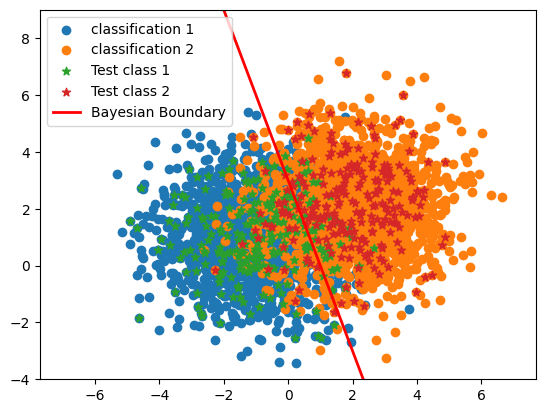

In [9]:
bayesianW, bayesianB = BayesianClassifier(TrainA, TrainB, mu1, mu2, cov)
print(bayesianW, bayesianB)
plotBayesianBoundary(TrainA, TrainB, TestA, TestB, bayesianW, bayesianB)

In [10]:
cov = np.array([[2,1],[1,2]])

In [11]:
A, B = binaryClassDataset(2000, mu1, mu2, cov)

In [12]:
TrainA, TrainB = A[:1750], B[:1750]
TestA, TestB = A[:250], B[:250]

[-1.66666667  0.33333333] -0.33333333333333326


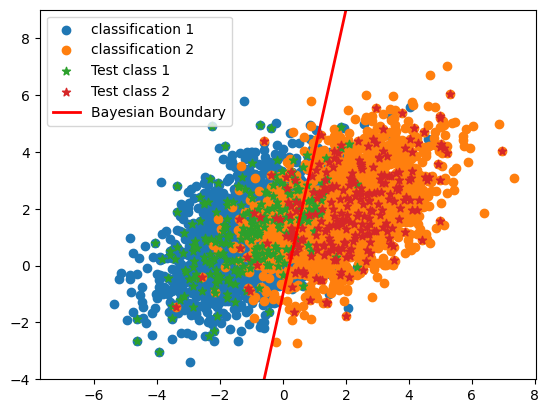

In [13]:
bayesianW, bayesianB = BayesianClassifier(TrainA, TrainB, mu1, mu2, cov)
print(bayesianW, bayesianB)
plotBayesianBoundary(TrainA, TrainB, TestA, TestB, bayesianW, bayesianB)

2. Write a function implementing the logistic regression model using the gradient descent
method using the dataset generated for question 1. Plot the decision boundary
obtained by the logistic regression. Compare it with the Bayesian decision boundary.

In [ ]:
X = np.concatenate((A, B), axis = 0)
# Generating labels for both classes 
Y = np.concatenate((np.zeros(A.shape[0]), np.ones(B.shape[0])), axis = 0)

data = np.column_stack((X, Y))
np.random.shuffle(data)

X, Y = data[:, :-1], data[:, -1]

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def computeCostOfLogistic(f_wb, Y): 
  cost = -Y * np.log(f_wb) - (1 - Y) * np.log(1 - f_wb)
  return np.mean(cost)

def logisticGradient(f_wb, X, Y):
  m = X.shape[0]
  err  = f_wb  - Y
  dw = X.T @ err
  db = np.ones((1, m)) @ err
  return dw, db

In [ ]:
def logisticGradientDescent(X, Y, learningRate = 0.01, epochs = 1000):
  m, n = X.shape
  W = np.zeros(n)   # Initialize W as zero vector of length n
  b = 0   # Initialize b as zero
  costs = []    # list for cost 

  for i in range(epochs):
    f_wb = sigmoid((X @ W ) + b)
    dw, db = logisticGradient(f_wb, X, Y)   # Gradient with respect to W and b
    costs.append(computeCostOfLogistic(f_wb, Y))  # Calculating cost for current iteration
    W -= learningRate * dw
    b -= learningRate * db
    learningRate /= (1 + 0.0002)

  # plt.figure(figsize = (3, 3))
  # plt.plot(range(epochs), costs)
  # plt.title('Cost')
  # plt.show()
  
  return W, b

In [ ]:
def plotLogisticBoundary(TrainA, TrainB, TestA, TestB, W, b):
  x = np.linspace(-7, 7)
  plt.ylim((-4, 9))

  y = (- b - W[0] * x) / W[1]

  plt.scatter(TrainA[:, 0], TrainA[:, 1], label = 'class 1')
  plt.scatter(TrainB[:, 0], TrainB[:, 1], label = 'class 2')
  plt.scatter(TestA[:, 0], TestA[:, 1], marker = '+', label = 'Test class 1')
  plt.scatter(TestB[:, 0], TestB[:, 1], marker = '+', label = 'Test class 2')

  plt.plot(x, y.T, color = 'black',
           linewidth = 2, label = 'Logistic Boundary')
  plt.legend()
  plt.show()

In [ ]:
def Predict(X,w,b):
    z = w @ X.T + b
    a = sigmoid(z)
    for i in range(len(a)):
        if a[i]< 0.5:
            a[i] = 0
        else:
            a[i] = 1
    return a

def accuracy(predicted,y):
    return np.mean(predicted == y)*100

3. Consider the Iris dataset. The dataset contains three types of flower described by the
four features. Consider only the data points with label 1 and 2. Divide the dataset into
training and testing set in the ration 8:1:1. Use the training set to train the logistic
regression model. Use the validation set to tune the parameter values of your model.
Finally obtain the accuracy on the test set.

In [ ]:
df = pd.read_csv('Iris - Iris.csv')
aDict = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
df['Species']  = df['Species'].map(aDict)
df = df[df['Species']!=2]

In [ ]:
y = np.array(df.Species.values)
X = np.array(df.drop(['Species'],axis= 1))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=10)

In [ ]:
logisticW, logisticb = logisticGradientDescent(X_train, y_train, learningRate = 0.0001,
                                               epochs = 10000)
print(logisticW, logisticb)


[ 0.12228221 -1.05870121 -1.56922656  1.46251952  0.69657267] [-0.41224052]


In [ ]:
preds = Predict(X_test,logisticW,logisticb)

4. Learn about the different evaluation measure of a classification model namely Accuracy,
Precision, Recall, Confusion matrix, F-Score and their significance. Write a brief note
about them and submit it (Not less than 200 words). Compute all of them for problem 3.

In [ ]:
accuracy(preds,y_test)

100.0

### Accuracy is a measure of the total number of correct predictions made by the classification model on the test set divided by the total number of predictions. It gives a general idea of the performance of the model but may not be a good measure if the classes in the dataset are imbalanced.

### Precision is the fraction of true positives out of all predicted positives. It measures the model's ability to correctly identify positive samples. It is calculated as true positives divided by the sum of true positives and false positives.

### Recall is the fraction of true positives out of all actual positives. It measures the model's ability to identify all positive samples. It is calculated as true positives divided by the sum of true positives and false negatives.

### Confusion matrix is a table that summarizes the number of correct and incorrect predictions made by the classification model. It gives a detailed breakdown of the model's performance by showing the true positives, false positives, true negatives, and false negatives.

### F-Score is a measure of the harmonic mean of precision and recall. It is a balanced metric that takes into account both precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall).

### Evaluation metrics play a crucial role in assessing the performance of a classification model. Accuracy, Precision, Recall, Confusion Matrix, and F-Score are some of the commonly used metrics that provide a comprehensive analysis of the model's performance. It is important to choose the appropriate metric based on the problem statement and dataset characteristics.